<a href="https://colab.research.google.com/github/joanby/trading-algoritmico-a-z-con-python/blob/main/ES_TA_Cap%C3%ADtulo_07_Ingenier%C3%ADa_de_Caracter%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="45px" src="https://www.quantreo.com/wp-content/uploads/2021/10/Original-on-Transparent.png" align="left" hspace="10px" vspace="0px">
<img alt="Colaboratory logo" height="45px" src="https://static-881c.kxcdn.com/wp-content/uploads/2016/03/frogamesLogoFull4.png" align="left" hspace="10px" vspace="0px"></p>

# Ingeniería de Características


En este capítulo, aprenderemos a crear indicadores técnicos por nosotros mismos y a crearlos utilizando la librería de análisis técnico de Python.

### Resumen
* Media móvil simple (SMA)
* Desviación Estándar Móvil (DMS)
* Crear otros indicadores utilizando la librería de Análisis Técnico (ta)

</br>

💰 Únete a la comunidad de [Discord](https://discord.gg/z3dx5XpkX4)

📚 Puedes leer nuestro libro en [Amazon](https://www.amazon.es/Python-para-finanzas-trading-algor%C3%ADtmico-ebook/dp/B0BT4ZS9Q3/)

🖥️ El canal de [YouTube de Quantreo's](https://www.youtube.com/channel/UCp7jckfiEglNf_Gj62VR0pw) (en inglés) y el de [Frogames](https://www.youtube.com/channel/UCMUxXNYrVCv6-bQakhomvBg) en español




In [1]:
!pip install yfinance
!pip install ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 7.5 MB/s 
     |████████████████████████████████| 62 kB 927 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel f

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cycler

colors = cycler('color',
                ['#669FEE', '#66EE91', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('figure', facecolor='#313233')
plt.rc('axes', facecolor="#313233", edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors,
       labelcolor='gray')
plt.rc('grid', color='474A4A', linestyle='solid')
plt.rc('xtick', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('legend', facecolor="#313233", edgecolor="#313233")
plt.rc("text", color="#C9C9C9")
plt.rc('figure', facecolor='#313233')

# Importar los datos

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import warnings
warnings.filterwarnings("ignore")
import yfinance as yf

In [5]:
# Importar los datos
df = yf.download("GOOG")
df.columns

[*********************100%***********************]  1 of 1 completed


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

**Importante**: Los nombres de las columnas son diferentes entre la importación usando la API de Yahoo Finanzas o la importación usando MetaTrader5. Por lo tanto, para eliminar este problema, vamos a renombrar las columnas necesarias siempre con el mismo nombre. En este caso, sólo necesitamos las columnas de Cierre Ajustado

In [6]:
# Renombrar las columnas
df = df[["Adj Close"]]
df.columns = ["close"]
df

close
Date                   
2004-08-19    49.982655
2004-08-20    53.952770
2004-08-23    54.495735
2004-08-24    52.239197
2004-08-25    52.802086
...                 ...
2022-06-14  2143.879883
2022-06-15  2207.810059
2022-06-16  2132.719971
2022-06-17  2157.310059
2022-06-21  2240.300049

[4491 rows x 1 columns]

# Media móvil simple (SMA)

In [11]:
# Media móvil simple
df["SMA 15"] = df[["close"]].rolling(15).mean().shift(1)
df["SMA 60"] = df[["close"]].rolling(60).mean().shift(1)

In [12]:
df

close       SMA 15       SMA 60
Date                                             
2004-08-19    49.982655          NaN          NaN
2004-08-20    53.952770          NaN          NaN
2004-08-23    54.495735          NaN          NaN
2004-08-24    52.239197          NaN          NaN
2004-08-25    52.802086          NaN          NaN
...                 ...          ...          ...
2022-06-14  2143.879883  2252.950684  2463.279838
2022-06-15  2207.810059  2246.987337  2453.410669
2022-06-16  2132.719971  2252.940007  2444.714669
2022-06-17  2157.310059  2254.002002  2433.500834
2022-06-21  2240.300049  2253.428011  2423.288167

[4491 rows x 3 columns]

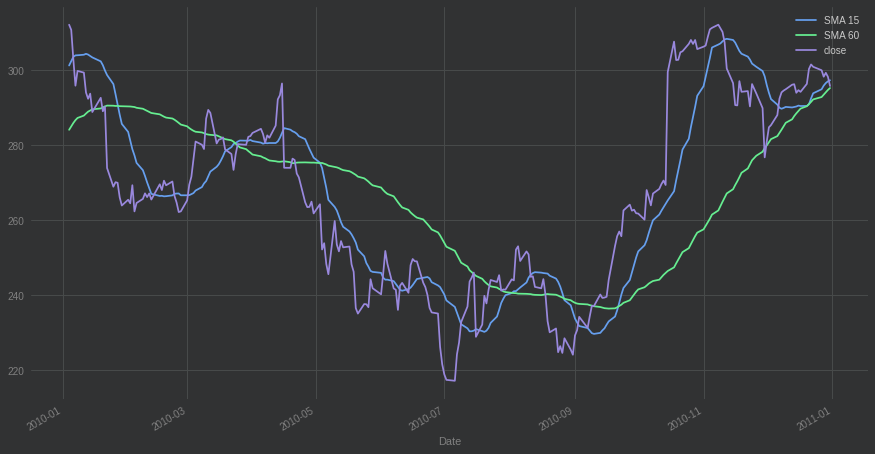

In [15]:
df[["SMA 15", "SMA 60", "close"]].loc["2010"].plot(figsize=(15,8))

# Desviación estándar móvil (MSD)

In [16]:
# Volatilidad del Retorno
df["returns"] = df["close"].pct_change(1)

df["MSD 15"] = df[["returns"]].rolling(15).std().shift(1)
df["MSD 60"] = df[["returns"]].rolling(60).std().shift(1)

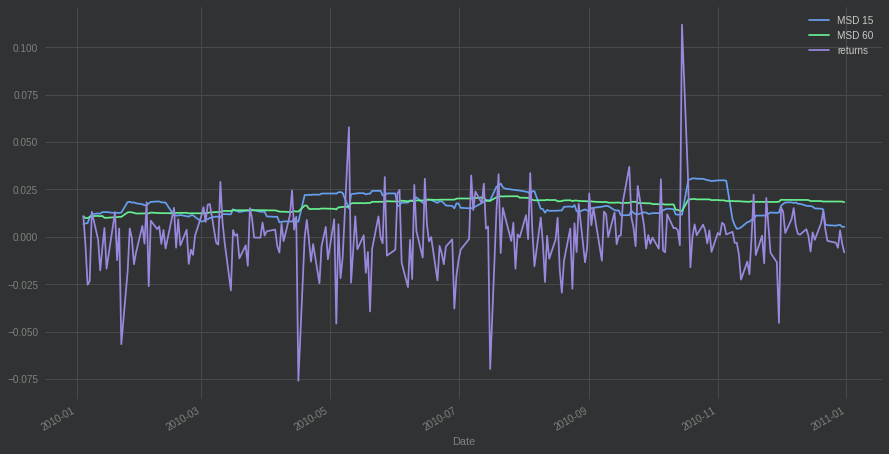

In [17]:
df[["MSD 15", "MSD 60", "returns"]].loc["2010"].plot(figsize=(15,8))

# Librería Technical Analysis (ta) 
https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html

Puedes consultar este enlace (documentación oficial de ta) si quieres usar otro indicador. (Esta no es la librería ta-lib, no te equivoques)

In [18]:
# Importar la librería ta
import ta
RSI = ta.momentum.RSIIndicator(df["close"], window=14, fillna=False)
RSI

In [19]:
df["rsi"] = RSI.rsi()

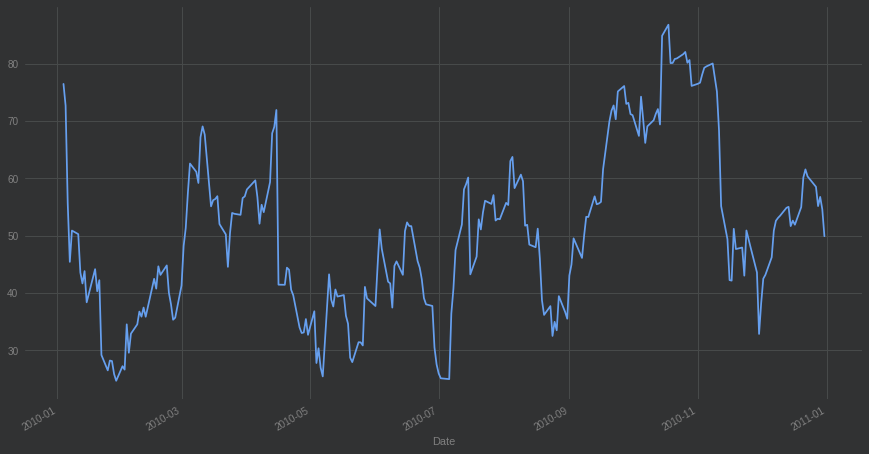

In [20]:
df["rsi"].loc["2010"].plot(figsize=(15,8))

# CREACIÓN DE LA FUNCIÓN

In [21]:
def feature_engineering(df):
    """ Crear nuevas variables"""
    
    # Copiamos el dataframe para evitar interferencias en los datos
    df_copy = df.copy()
    
    # Creamos el retorno
    df_copy["returns"] = df_copy["close"].pct_change(1)

    # Creamos las SMAs
    df_copy["SMA 15"] = df_copy[["close"]].rolling(15).mean().shift(1)
    df_copy["SMA 60"] = df_copy[["close"]].rolling(60).mean().shift(1)
    
    # Crear la volatilidad
    df_copy["MSD 10"] = df_copy[["returns"]].rolling(10).std().shift(1)
    df_copy["MSD 30"] = df_copy[["returns"]].rolling(30).std().shift(1)
    
    # Crear el RSI
    RSI = ta.momentum.RSIIndicator(df_copy["close"], window= 14, fillna = False)
    df_copy["rsi"] = RSI.rsi()
    
    return df_copy

In [22]:
df = yf.download("GOOG")
df = df[["Adj Close"]]
df.columns = ["close"]

[*********************100%***********************]  1 of 1 completed


In [23]:
df

close
Date                   
2004-08-19    49.982655
2004-08-20    53.952770
2004-08-23    54.495735
2004-08-24    52.239197
2004-08-25    52.802086
...                 ...
2022-06-14  2143.879883
2022-06-15  2207.810059
2022-06-16  2132.719971
2022-06-17  2157.310059
2022-06-21  2240.300049

[4491 rows x 1 columns]

In [24]:
feature_engineering(df)

close   returns       SMA 15       SMA 60    MSD 10  \
Date                                                                    
2004-08-19    49.982655       NaN          NaN          NaN       NaN   
2004-08-20    53.952770  0.079430          NaN          NaN       NaN   
2004-08-23    54.495735  0.010064          NaN          NaN       NaN   
2004-08-24    52.239197 -0.041408          NaN          NaN       NaN   
2004-08-25    52.802086  0.010775          NaN          NaN       NaN   
...                 ...       ...          ...          ...       ...   
2022-06-14  2143.879883  0.002971  2252.950684  2463.279838  0.023643   
2022-06-15  2207.810059  0.029820  2246.987337  2453.410669  0.023166   
2022-06-16  2132.719971 -0.034011  2252.940007  2444.714669  0.025773   
2022-06-17  2157.310059  0.011530  2254.002002  2433.500834  0.024281   
2022-06-21  2240.300049  0.038469  2253.428011  2423.288167  0.024267   

              MSD 30        rsi  
Date                             
2004-08-19       NaN        NaN  
2004-08-20       NaN        NaN  
2004-08-23       NaN        NaN  
2004-08-24       NaN        NaN  
2004-08-25       NaN        NaN  
...              ...        ...  
2022-06-14  0.025323  37.977281  
2022-06-15  0.025028  43.980304  
2022-06-16  0.025653  39.183187  
2022-06-17  0.025173  41.435949  
2022-06-21  0.023956  48.384894  

[4491 rows x 7 columns]